# Project 2: Ames Housing Project Suggestions

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import Imputer, PolynomialFeatures,StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [4]:
ames=pd.read_csv('train2.csv')
ames_test=pd.read_csv('test.csv')
data_dict=pd.read_excel('data_dict2.xls')


In [5]:
df=pd.DataFrame(ames)

# Data Checking
1)identify numeric and non-mumeric columns and their NaNs<br>
2)identify datatypes for conversion<br>
3)determine meaning of missing values by cross-checking with data dictionary<br>


In [6]:
ames.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [7]:
#create a function that identifies non-numeric columns and their NaNs by taking an argument of the file in the function and checking the columns for non numeric objects

def check_cols(ames):
    check_cols=ames.select_dtypes([np.object]).columns
    for col in check_cols:
        n_nan=ames[col].isnull().sum()
        if n_nan>0:
            print("{} has {} NaNs".format(col,n_nan))
            
    return

pd.DataFrame(check_cols(ames))

Alley has 1911 NaNs
Mas Vnr Type has 22 NaNs
Bsmt Qual has 55 NaNs
Bsmt Cond has 55 NaNs
Bsmt Exposure has 58 NaNs
BsmtFin Type 1 has 55 NaNs
BsmtFin Type 2 has 56 NaNs
Fireplace Qu has 1000 NaNs
Garage Type has 113 NaNs
Garage Finish has 114 NaNs
Garage Qual has 114 NaNs
Garage Cond has 114 NaNs
Pool QC has 2042 NaNs
Fence has 1651 NaNs
Misc Feature has 1986 NaNs


""


In [8]:
#create a function that identifies numeric columns (integers and floats) and their NaNsby taking an argument of the file in the function and checking the columns for numeric integers or floats



def check_cols(ames):
    check_cols=ames.select_dtypes([np.float, np.int]).columns
    for col in check_cols:
        n_nan=ames[col].isnull().sum()
        if n_nan>0:
            print("{} has {} NaNs".format(col,n_nan))
            
    return

pd.DataFrame(check_cols(ames))

Lot Frontage has 330 NaNs
Mas Vnr Area has 22 NaNs
BsmtFin SF 1 has 1 NaNs
BsmtFin SF 2 has 1 NaNs
Bsmt Unf SF has 1 NaNs
Total Bsmt SF has 1 NaNs
Bsmt Full Bath has 2 NaNs
Bsmt Half Bath has 2 NaNs
Garage Yr Blt has 114 NaNs
Garage Cars has 1 NaNs
Garage Area has 1 NaNs


""


In [9]:
data_dict2

,Name,data type,Description
0,id,int64,ID Index Number
1,pid,int64,PID (Nominal): Parcel identification number -...
2,lot_frontage,float64,Lot Frontage (Continuous): Linear feet of stre...
3,lot_area,int64,Lot Area (Continuous): Lot size in square feet
4,lot_shape,object,Lot Shape (Ordinal): General shape of property
...,...,...,...
156,house_style_2.5Fin,uint8,House Style (Nominal): Style of dwelling
157,house_style_2.5Unf,uint8,House Style (Nominal): Style of dwelling
158,house_style_2Story,uint8,House Style (Nominal): Style of dwelling
159,house_style_SFoyer,uint8,House Style (Nominal): Style of dwelling


In [10]:
#check datatypes
#to view all rows:
#pd.options.display.max_rows = None
pd.DataFrame(ames.dtypes, columns=['DataType'])

,DataType
Id,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
...,...
Misc Val,int64
Mo Sold,int64
Yr Sold,int64
Sale Type,object


# Data Cleaning Train Set
1) convert headings to underscore and lowercase<br> 
2) change NaNs in numeric columns to 0<br>
3) impute remaining null values<br>
4) create new columns<br>
5) remove collinear features<br>

In [11]:
#I am iterating x in ames data file and after each iteration stripping away the space character 
#to convert headings  to be underscored and lowercase to avoid technical issues when coding


#To view alll columns:
#pd.options.display.max_columns= None

ames.columns = [x.strip().replace(' ', '_') for x in ames.columns.str.lower()]



In [12]:
#condition_1 and condition_2 are vaguely worded and will be renamed for greater clarity
ames.rename(columns={'condition_1':'proximity_to_transport'}, inplace=True)
ames.rename(columns={'condition_2':'proximity_to_more_than_1_transport'},inplace=True)


In [13]:
#create a function will turn "ranking" columns into numeric ones
#I am iterating keys and values in the dictionry called dict values's items and replacing the key with its values but as a string

def clean_quality_cols(df,col,dict_values,fill_value):
    possible_values=dict_values.keys()
    clean_check_col(df,col,possible_values,fill_value)
    
    for key,value in dict_values.items():
        df[col]=df[col].map(lambda cell:cell.replace(key,str(value)))
    df[col]=df[col].astype(int)
    return

In [14]:
#create a function that changes the Nans in numeric columns to the value 0

val=0
def clean_data(col,val):
    numeric_cols=ames.select_dtypes([np.int64,np.float64,np.uint64]).columns
    ames[numeric_cols]=ames[numeric_cols].fillna(val)
    
    return

In [15]:
# create a function that will take values which is the name of a set and that set is being made from the list df and that 
# list of dataframes is taking its index from the column number
# if the items in the set called values is not part of the possible values then it will go inside the 
# f condition and execute that printed statement

def clean_check_col(df,col,possible_values,fill_value):
    df[col]=df[col].fillna(fill_value)
    values = set (df[col])
    if not values.issubset(possible_values):
        print("Problem with {}".format(col))
    return

In [16]:
#Turn "quality" columns into numeric ones

ames['exter_qual'] = ames['exter_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['exter_cond'] = ames['exter_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['kitchen_qual'] = ames['kitchen_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['bsmt_qual'] = ames['bsmt_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['heating_qc'] = ames['heating_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['fireplace_qu'] = ames['fireplace_qu'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['garage_qual'] = ames['garage_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['garage_cond'] = ames['garage_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['bsmt_cond'] = ames['bsmt_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['pool_qc'] = ames['pool_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames['land_slope'] = ames['land_slope'].apply({'Gtl' : 3,'Mod' : 2,'Sev' : 1,'0'  : 0 }.get)
ames['bsmt_exposure'] = ames['bsmt_exposure'].apply({'Gd' : 4,'Av' : 3,'Mn' : 2,'No' : 1,'0' : 0 }.get)
ames['garage_finish'] = ames['garage_finish'].apply({'Fin' : 3, 'RFn' : 2,'Unf' : 1,'0' : 0 }.get)
ames['central_air'] = ames['central_air'].apply({'Y' : 1,'N' : 0 }.get)


In [17]:
#The following NA/NaNs represents instances where these variables are absent from the houses
#and hence will be converted to zero : 
#lot_frontage,alley,fireplace_qu, pool_qc,fence and misc_feature, mas_vnr_type, 
#mas_vnr_area, bsmt_qual, bsmt_cond,bsmt_exposure, bsmtfin_type_1, 
#bsmtfin_type_2,garage_type, garage_yr_#blt, garage_finish,garage_qual,garage_cond.

#These NaNs and their rows have not been removed as this absent data is deemed
#as fairly accurate and the integrity of the data sound. 


ames['lot_frontage'].fillna(0, inplace=True)
#ames['alley'].fillna(0, inplace=True)
ames['fireplace_qu'].fillna(0, inplace=True)
ames['pool_qc'].fillna(0, inplace=True)
ames['fence'].fillna(0, inplace=True)
ames['misc_feature'].fillna(0, inplace=True)
#ames['mas_vnr_type'].fillna(0, inplace=True)
ames['mas_vnr_area'].fillna(0, inplace=True)
ames['bsmt_qual'].fillna(0, inplace=True)
ames['bsmt_cond'].fillna(0, inplace=True)
ames['bsmt_exposure'].fillna(0, inplace=True)
ames['bsmtfin_type_1'].fillna(0, inplace=True)
ames['bsmtfin_type_2'].fillna(0, inplace=True)
ames['garage_type'].fillna(0, inplace=True)
ames['garage_yr_blt'].fillna(0, inplace=True)
ames['garage_finish'].fillna(0, inplace=True)
ames['garage_qual'].fillna(0, inplace=True)
ames['garage_cond'].fillna(0, inplace=True)

In [18]:
#identify categorical data that needs to be converted with dummies
todummy_list=['ms_subclass','ms_zoning','street','alley','land_contour','utilities',
              'lot_config','land_slope','neighborhood','proximity_to_transport',
              'proximity_to_more_than_1_transport',
              'bldg_type','house_style', 'roof_style','roof_matl','exterior_1st',
              'exterior_2nd','mas_vnr_type' ]



In [19]:

#create a function that uses get_dummies to assign numerical values for each NA column


def dummy_ames(ames,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(ames[x],prefix=x,dummy_na=False)
        ames=ames.drop(x,1)
        ames=pd.concat([ames,dummies],axis=1)
    return ames
    

In [20]:
ames = dummy_ames(ames,todummy_list)
print(ames.head(10))

     id        pid  lot_frontage  lot_area lot_shape  overall_qual  \
0   109  533352170           0.0     13517       IR1             6   
1   544  531379050          43.0     11492       IR1             7   
2   153  535304180          68.0      7922       Reg             5   
3   318  916386060          73.0      9802       Reg             5   
4   255  906425045          82.0     14235       IR1             6   
5   138  535126040         137.0     16492       IR1             6   
6  2827  908186070          35.0      3675       Reg             6   
7   145  535154050           0.0     12160       IR1             5   
8  1942  535353130           0.0     15783       Reg             5   
9  1956  535426130          70.0     11606       IR1             5   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  \
0             8        1976            2005         289.0  ...   
1             5        1996            1997         132.0  ...   
2             7        1953    

In [21]:
#pd.options.display.max_rows = None
pd.DataFrame(ames.dtypes, columns=['data type'])

,data type
id,int64
pid,int64
lot_frontage,float64
lot_area,int64
lot_shape,object
...,...
exterior_2nd_Wd Shng,uint8
mas_vnr_type_BrkCmn,uint8
mas_vnr_type_BrkFace,uint8
mas_vnr_type_None,uint8


Mean imputation was used to replace the missing values (NA/NaN) for the following continuous variables found below: bsmtfin_sf_1,bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf.

These features appear to have an equal number of missing values. However this is not due 
to incomplete data collection as the description for these variables is given as  ‘NA’   = ‘No Basement’.

While we note that mean imputation may not preserve the relationship amongst variables, this method was selected as the number of these NaNs is small and unlikely to compromise the final data analsis. 


This imputation method was also appropriate given that these were continuous variables. 


In [22]:
ames.bsmtfin_sf_1.mean()

442.30048780487806

In [23]:
ames['bsmtfin_sf_1_mean']=ames['bsmtfin_sf_1'].fillna(442.3004878048780)

In [24]:
ames.bsmtfin_sf_2.mean()

47.959024390243904

In [25]:
ames['bsmtfin_sf_2_mean']=ames['bsmtfin_sf_2'].fillna(47.959024390243904)

In [26]:
ames.bsmt_unf_sf.mean()

567.7282926829268

In [27]:
ames['bsmt_unf_sf_mean']=ames['bsmt_unf_sf'].fillna(567.7282926829268)

In [28]:
ames.total_bsmt_sf.mean()

1057.9878048780488

In [29]:
ames['total_bsmt_sf']=df['total_bsmt_sf'].fillna(1057.9878048780488)

# Clean Test Set
We will be cleaning the test set in the same way.

In [30]:
ames_test.columns = [x.strip().replace(' ', '_') for x in ames_test.columns.str.lower()]

In [31]:
ames_test.set_index('pid')

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
pid,,,,,,,,,,,,,,,,,,,,,
902301120,2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
905108090,2718,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
528218130,2414,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
902207150,1989,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
535105100,625,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527377110,1662,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
535126140,1234,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
904100040,1373,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD


In [32]:
ames_test.rename(columns={'condition_1':'proximity_to_transport'}, inplace=True)
ames_test.rename(columns={'condition_2':'proximity_to_more_than_1_transport'},inplace=True)

In [33]:
#create a function that changes the Nans in numeric columns to the value 0

val=0
def clean_data(col,val):
    numeric_cols=ames_test.select_dtypes([np.int64,np.float64,np.uint64]).columns
    ames_test[numeric_cols]=ames_test[numeric_cols].fillna(val)
    
    return

In [34]:
#Turn "quality" columns into numeric ones

ames_test['exter_qual'] = ames_test['exter_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['exter_cond'] = ames_test['exter_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['kitchen_qual'] = ames_test['kitchen_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['bsmt_qual'] = ames_test['bsmt_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['heating_qc'] = ames_test['heating_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['fireplace_qu'] = ames_test['fireplace_qu'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['garage_qual'] = ames_test['garage_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['garage_cond'] = ames_test['garage_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['bsmt_cond'] = ames_test['bsmt_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['pool_qc'] = ames_test['pool_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
ames_test['land_slope'] = ames_test['land_slope'].apply({'Gtl' : 3,'Mod' : 2,'Sev' : 1,'0'  : 0 }.get)
ames_test['bsmt_exposure'] = ames_test['bsmt_exposure'].apply({'Gd' : 4,'Av' : 3,'Mn' : 2,'No' : 1,'0' : 0 }.get)
ames_test['garage_finish'] = ames_test['garage_finish'].apply({'Fin' : 3, 'RFn' : 2,'Unf' : 1,'0' : 0 }.get)
ames_test['central_air'] = ames_test['central_air'].apply({'Y' : 1,'N' : 0 }.get)



In [35]:
#identify categorical data that needs to be converted with dummies
todummy_list_test=['ms_subclass','ms_zoning','street','alley','land_contour','utilities',
              'lot_config','land_slope','neighborhood','proximity_to_transport',
              'proximity_to_more_than_1_transport',
              'bldg_type','house_style', 'roof_style','roof_matl','exterior_1st',
              'exterior_2nd','mas_vnr_type' ]



In [36]:
def dummy_ames_test(ames,todummy_list_test):
    for x in todummy_list_test:
        dummies=pd.get_dummies(ames[x],prefix=x,dummy_na=False)
        ames=ames.drop(x,1)
        ames=pd.concat([ames,dummies],axis=1)
    return ames
    

In [37]:
ames_test = dummy_ames_test(ames_test,todummy_list_test)
print(ames_test.head(10))

     id        pid  lot_frontage  lot_area lot_shape  overall_qual  \
0  2658  902301120          69.0      9142       Reg             6   
1  2718  905108090           NaN      9662       IR1             5   
2  2414  528218130          58.0     17104       IR1             7   
3  1989  902207150          60.0      8520       Reg             5   
4   625  535105100           NaN      9500       IR1             6   
5   333  923228370          21.0      1890       Reg             4   
6  1327  902427150          52.0      8516       Reg             4   
7   858  907202130           NaN      9286       IR1             5   
8    95  533208090          39.0      3515       Reg             7   
9  1568  914476010          75.0     10125       Reg             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  \
0             8        1910            1950           0.0  ...   
1             4        1977            1977           0.0  ...   
2             5        2006    

In [38]:
#The following NA/NaNs represents instances where these variables are absent from the houses
#and hence will be converted to zero : 
#lot_frontage,alley,fireplace_qu, pool_qc,fence and misc_feature, mas_vnr_type, 
#mas_vnr_area, bsmt_qual, bsmt_cond,bsmt_exposure, bsmtfin_type_1, 
#bsmtfin_type_2,garage_type, garage_yr_#blt, garage_finish,garage_qual,garage_cond.

#These NaNs and their rows have not been removed as this absent data is deemed
#as fairly accurate and the integrity of the data sound. 


ames_test['lot_frontage'].fillna(0, inplace=True)
#ames_test['alley'].fillna(0, inplace=True)
ames_test['fireplace_qu'].fillna(0, inplace=True)
ames_test['pool_qc'].fillna(0, inplace=True)
ames_test['fence'].fillna(0, inplace=True)
ames_test['misc_feature'].fillna(0, inplace=True)
#ames_test['mas_vnr_type'].fillna(0, inplace=True)
#ames_test['mas_vnr_area'].fillna(0, inplace=True)
ames_test['bsmt_qual'].fillna(0, inplace=True)
ames_test['bsmt_cond'].fillna(0, inplace=True)
ames_test['bsmt_exposure'].fillna(0, inplace=True)
ames_test['bsmtfin_type_1'].fillna(0, inplace=True)
ames_test['bsmtfin_type_2'].fillna(0, inplace=True)
ames_test['garage_type'].fillna(0, inplace=True)
ames_test['garage_yr_blt'].fillna(0, inplace=True)
ames_test['garage_finish'].fillna(0, inplace=True)
ames_test['garage_qual'].fillna(0, inplace=True)
ames_test['garage_cond'].fillna(0, inplace=True)

In [39]:
ames_test.bsmtfin_sf_1.mean()

443.39704209328784

In [40]:
ames_test['bsmtfin_sf_1_mean']=ames['bsmtfin_sf_1'].fillna(442.3004878048780)

In [41]:
ames_test.bsmtfin_sf_2.mean()

53.83503981797497

In [42]:
ames_test['bsmtfin_sf_2_mean']=ames['bsmtfin_sf_2'].fillna(47.959024390243904)

In [43]:
ames_test['bsmt_unf_sf_mean']=ames['bsmt_unf_sf'].fillna(567.7282926829268)

In [44]:
ames_test.total_bsmt_sf.mean()

1036.7508532423208

In [45]:
ames_test['total_bsmt_sf']=df['total_bsmt_sf'].fillna(1057.9878048780488)

In [46]:
df3=ames_test[['id','overall_qual','year_built','year_remod/add','total_bsmt_sf','1st_flr_sf','gr_liv_area','full_bath','garage_area']]

# Feature Engineering

In [47]:
#We will be combining OpenPorch, EnclosedPorch, 3SsnPorch and Screenporch into a single variable.
#Instead of porch area, we will mark the new variable as 1 for Porch exists and 0 for No Porch

ames['porch'] = ames['open_porch_sf']+ames['enclosed_porch']+ames['3ssn_porch']+ames['screen_porch']
ames['porch'] = ames['porch'].astype(bool).astype(int)

ames['porch'].value_counts()


1    1438
0     613
Name: porch, dtype: int64

In [48]:
#We will now combine FullBath, BsmtFullBath and HalfBath, BsmtHalfBath to show the total number of Full and Half Bathrooms
ames['full_bath'] = ames['full_bath'] + ames['bsmt_full_bath']
ames['half_bath'] = ames['half_bath'] + ames['bsmt_half_bath']

#Since we created new features from existing ones, lets drop them

drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 'enclosed_porch', 'open_porch_sf','screen_porch']
ames.drop(drop_col, axis=1, inplace=True)
ames.shape

(2051, 207)

In [49]:
ames.dtypes

id                      int64
pid                     int64
lot_frontage          float64
lot_area                int64
lot_shape              object
                       ...   
mas_vnr_type_Stone      uint8
bsmtfin_sf_1_mean     float64
bsmtfin_sf_2_mean     float64
bsmt_unf_sf_mean      float64
porch                   int64
Length: 207, dtype: object

In [50]:
#Description says  ‘NA’ or null values on GarageCond mean ‘No Garage’ which is same for other garage features.
#Numeric Garage fields ‘garage_area’, garage_cars and garage_yr_blt should be made zero for rows where GarageCond is null

ames

,id,pid,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,bsmtfin_sf_1_mean,bsmtfin_sf_2_mean,bsmt_unf_sf_mean,porch
0,109,533352170,0.0,13517,IR1,6,8,1976,2005,289.0,...,0,0,0,1,0,0,533.0,0.0,192.0,1
1,544,531379050,43.0,11492,IR1,7,5,1996,1997,132.0,...,0,0,0,1,0,0,637.0,0.0,276.0,1
2,153,535304180,68.0,7922,Reg,5,7,1953,2007,0.0,...,0,0,0,0,1,0,731.0,0.0,326.0,1
3,318,916386060,73.0,9802,Reg,5,5,2006,2007,0.0,...,0,0,0,0,1,0,0.0,0.0,384.0,0
4,255,906425045,82.0,14235,IR1,6,8,1900,1993,0.0,...,0,0,0,0,1,0,0.0,0.0,676.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,79.0,11449,IR1,8,5,2007,2007,0.0,...,0,0,0,0,1,0,1011.0,0.0,873.0,1
2047,785,905377130,0.0,12342,IR1,4,5,1940,1950,0.0,...,0,0,0,0,1,0,262.0,0.0,599.0,0
2048,916,909253010,57.0,7558,Reg,6,6,1928,1950,0.0,...,0,0,0,0,1,0,0.0,0.0,896.0,0
2049,639,535179160,80.0,10400,Reg,4,5,1956,1956,0.0,...,0,0,0,0,1,0,155.0,750.0,295.0,1


# Exploration

In [51]:
def find_outliers_tukey(ames):
    q1=np.percentile(ames,25)
    q3=np.percentile(ames,75)
    iqr=q3<q1
    floor=q1-1.5*iqr
    ceiling=q3+1.5*iqr
    outlier_indices=list(ames.index[(ames<floor)|(ames>ceiling)])
    outlier_values=list(ames[outlier_indices])

    return outlier_indices,outlier_values

In [52]:
tukey_indices,tukey_values=find_outliers_tukey(ames['saleprice'])
print(np.sort(tukey_values))

[ 12789  13100  34900 ... 584500 591587 611657]


In [53]:
df2=ames[['id','saleprice','overall_qual','year_built','year_remod/add','total_bsmt_sf','1st_flr_sf','gr_liv_area','full_bath','garage_area']]

(10.5, -0.5)

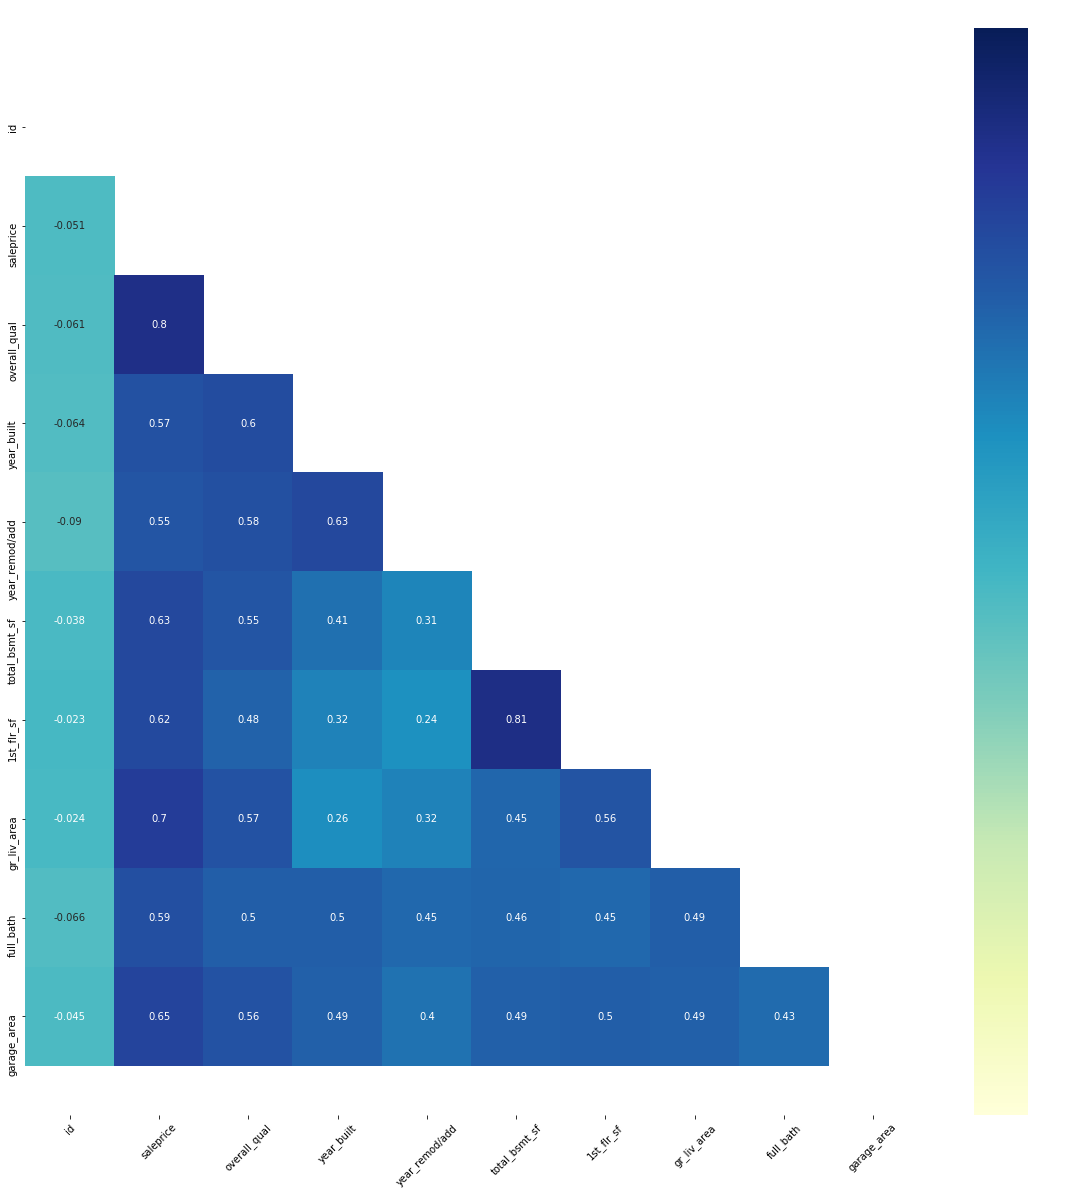

In [54]:
plt.figure(figsize=(20,20))
plt.title('Fig 1: Housing Data Correlation', color='white',fontsize=20)
mask = np.zeros(df2.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.style.use('dark_background')
plt.xticks(rotation=45)
ax = sns.heatmap(df2.corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


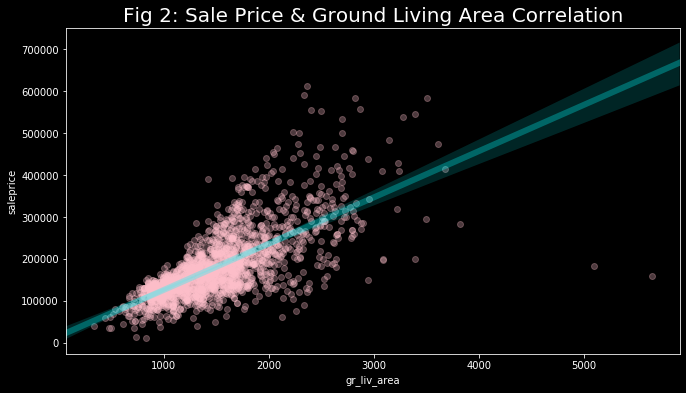

In [55]:


plt.style.use('dark_background')
plt.figure(figsize=(11,6))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Fig 2: Sale Price & Ground Living Area Correlation',fontsize=20 )
sns.regplot(df2.gr_liv_area, df2.saleprice, data = df2, scatter_kws = {'color': 'pink', 'alpha': 0.3}, line_kws = {'color': '#00FFFF', 'alpha': 0.3, 'lw':6})



/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Fig 3a: Sales Price & Overall Quality, 1st Flr Sqft, Total Basement Sqft Correlation')

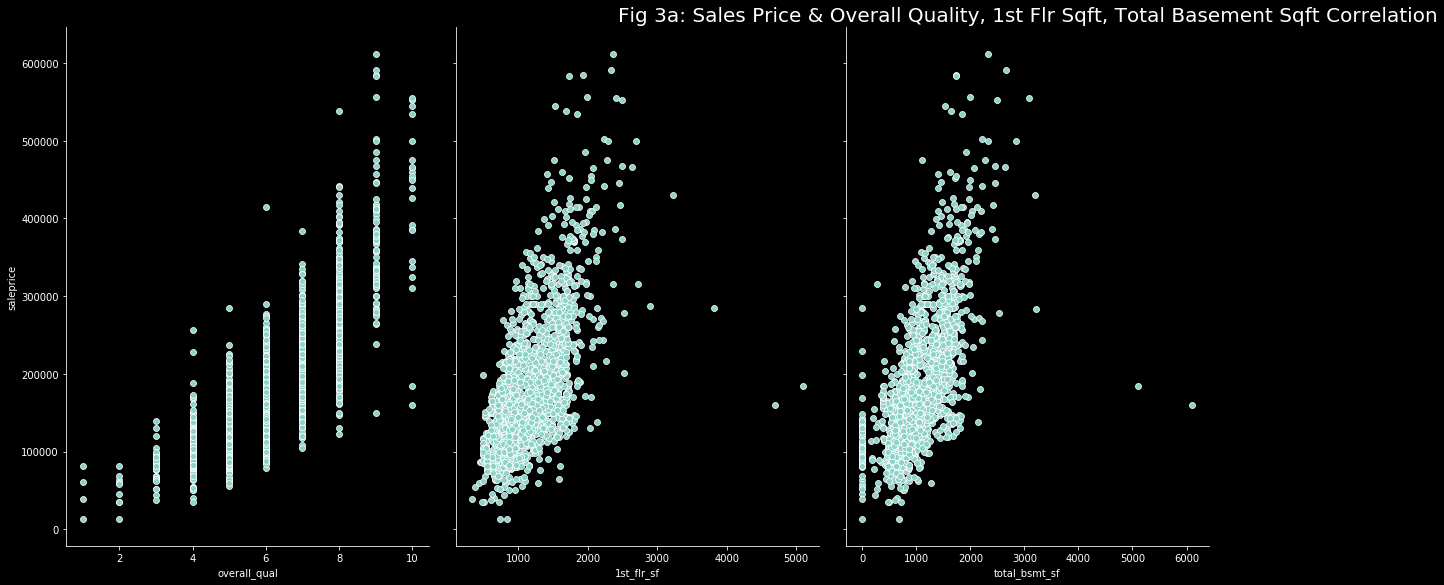

In [56]:

sns.pairplot(df2,x_vars=['overall_qual','1st_flr_sf','total_bsmt_sf'], y_vars=['saleprice'], size=8, aspect=0.7)
plt.title('Fig 3a: Sales Price & Overall Quality, 1st Flr Sqft, Total Basement Sqft Correlation', fontsize=20)




#we can see that there is somewhat of a linear relationship between saleprice  and overall quality.
#Hence as overall quality increases, saleprice increases in a somewhat linear way as highlighted by 
#the line of best fit and 95%confidence band. 

#Because there appears to be a linear relationship 
#between the features and response (i.e saleprice), we will focusing first on the
#linear regression model.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Fig 3b: Full Bath , Garage Area, Year Built,Year Remod / Add Correlation')

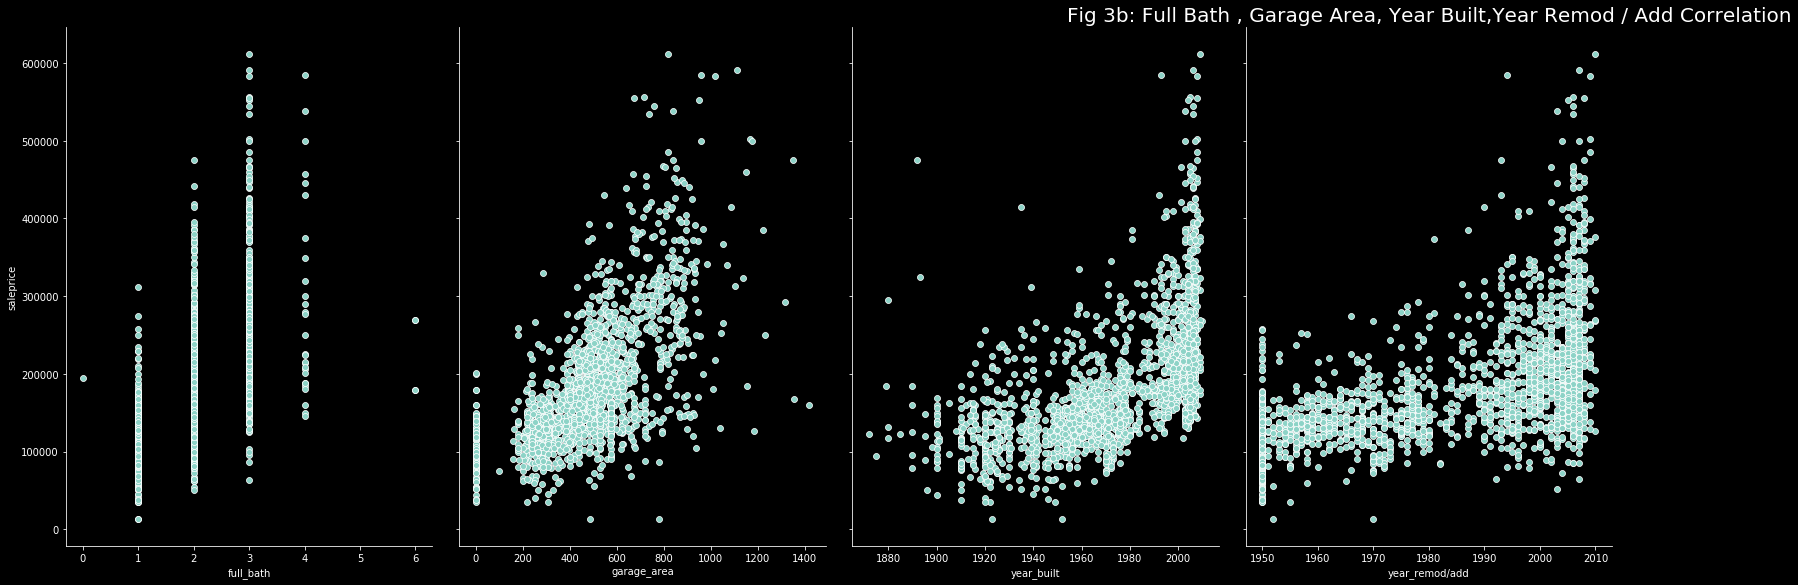

In [57]:
sns.pairplot(df2,x_vars=['full_bath','garage_area','year_built','year_remod/add'], 
              y_vars=['saleprice'], size=8, aspect=0.7)
plt.title('Fig 3b: Full Bath , Garage Area, Year Built,Year Remod / Add Correlation', fontsize=20)



In [58]:
#There appears to be a less strong relationship between garage area and saleprice.




# Plot Distributions of the Top Correlated Variables

Text(0.5, 1.0, 'Fig 4: Distribution between Top Correlated Variables')

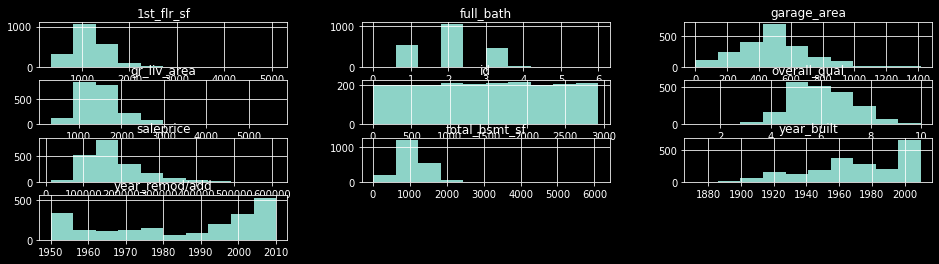

In [59]:
df2.hist(figsize=(16,4))
plt.title('Fig 4: Distribution between Top Correlated Variables')


We observe that the distribution is right skewed for the year built and gthe year renovated. This suggests that the gains from sales price resulting from renovation works tends to be those in more recent years. This informs choice and selection of property to invest and develop.

# Remove Outliers

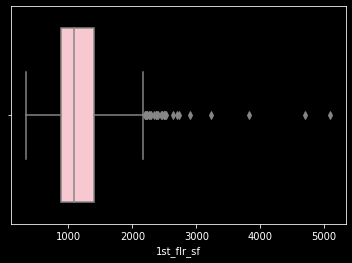

In [60]:
sns.boxplot(df2['1st_flr_sf'], color='pink')

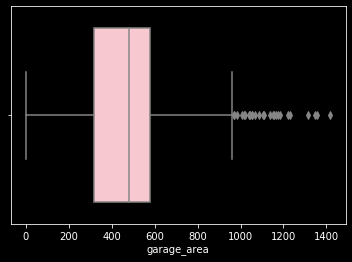

In [61]:
sns.boxplot(df2['garage_area'], color='pink')

The following outliers identified below will be removed:

The following houses were removed from the data:
Index 1035,1141,960,1885,616.

Removing these outliers also reduced potential outliers in more than 1 category


In [62]:
df2[(df2['saleprice']>300000) & (df2['year_built']<1900)]

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area
1035,2667,475000,10,1892,1993,1107.0,1518,3608,2.0,840.0
1141,1321,325000,10,1893,2000,1237.0,1521,2775,3.0,880.0


In [63]:
df2.drop([1035,1141],axis=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
pd.options.display.max_rows = None
df[(df['saleprice']<300000) & (df['total_bsmt_sf']>5000)]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [65]:
df2[(df2['saleprice']<300000) & (df2['total_bsmt_sf']>5000)]

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area
960,1499,160000,10,2008,2008,6110.0,4692,5642,4.0,1418.0
1885,2181,183850,10,2008,2009,5095.0,5095,5095,3.0,1154.0


In [66]:
df2.drop([960,1885],axis=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
df2[(df2['saleprice']<300000) & (df2['1st_flr_sf']>3000)]

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area
616,1498,284700,5,1959,1996,0.0,3820,3820,NaN,624.0


In [68]:
df2.drop([616],axis=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
df2[(df2['saleprice']<300000) & (df2['gr_liv_area']>5000)]

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area


In [70]:
pd.options.display.max_columns = None
df2.loc[df2['garage_area'].isnull(),:].head()

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area
1712,2237,150909,5,1923,1999,859.0,942,1828,2.0,NaN


In [64]:
df2.drop([1712],axis=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
df2.loc[df2['full_bath'].isnull(),:].head()

,id,saleprice,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,garage_area
1327,1342,79000,4,1946,1950,1057.987805,896,896,NaN,280.0


In [66]:
df2.drop([1327],axis=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
#pd.options.display.max_rows = None
df2.isnull().sum()

id                0
saleprice         0
overall_qual      0
year_built        0
year_remod/add    0
total_bsmt_sf     0
1st_flr_sf        0
gr_liv_area       0
full_bath         0
garage_area       0
dtype: int64

In [68]:
df2.columns


Index(['id', 'saleprice', 'overall_qual', 'year_built', 'year_remod/add',
       'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath',
       'garage_area'],
      dtype='object')

In [69]:
df4=pd.DataFrame(df2)

In [70]:
#dataframe withour salesprice with id

df4.drop(columns=['saleprice'], inplace=True)


In [71]:
#The features are ['id', 'saleprice', 'overall_qual', 'year_built', 'year_remod/add',
#'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath','garage_area'].
#The response variable is the saleprice

#Create features matrix (X) and target vector (y)
#features=[col for col in df2._get_numeric_data().columns if col!='saleprice']
X=df4
y=df2['saleprice']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [73]:
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [74]:
df4.columns

Index(['id', 'overall_qual', 'year_built', 'year_remod/add', 'total_bsmt_sf',
       '1st_flr_sf', 'gr_liv_area', 'full_bath', 'garage_area'],
      dtype='object')

In [75]:
lr=LinearRegression()

In [76]:
lasso=LassoCV(n_alphas=200)

In [77]:
ridge=RidgeCV(alphas=np.linspace(.1,10,100))

In [78]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=3)
lr_scores.mean()

0.8212934167605034

In [79]:
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=3)
lasso_scores.mean()

0.8217126641115011

In [80]:
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=3)
ridge_scores.mean()

0.8213566230416545

In [81]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=5)
lr_scores.mean()

0.8216802090490626

In [82]:
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=5)
lasso_scores.mean()

0.8219332762579219

In [83]:
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=5)
ridge_scores.mean()

0.821754946702207

In [102]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=10)
lr_scores.mean()

0.8220636327502696

In [103]:
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=10)
lasso_scores.mean()

0.8221608553468652

In [104]:
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=10)
ridge_scores.mean()

0.8221181863111079

# Fitting the Linear Regression model to the training data

In [106]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
lr.score(X_train,y_train)

0.8267845719876664

In [113]:
lr_scores.mean()

0.8220636327502696

In [114]:
pred=lr.predict(X_test)

In [115]:
r2_score(y_test,pred)

0.8380306167098994

In [116]:
pred=lr.predict(df3)

In [117]:
pred

array([8.94511564e+07, 1.01105073e+08, 8.27129802e+07, 6.29454700e+07,
       7.92066890e+07, 7.56537404e+07, 6.69973996e+07, 7.98993358e+07,
       8.69788663e+07, 8.07276210e+07, 7.22354145e+07, 7.40087671e+07,
       6.98856161e+07, 1.18366698e+08, 9.43049575e+07, 8.57505249e+07,
       7.96605275e+07, 7.37224369e+07, 9.03855810e+07, 8.45910382e+07,
       6.97648890e+07, 7.63055454e+07, 9.36303128e+07, 7.48111903e+07,
       8.00617681e+07, 7.24410609e+07, 8.81438369e+07, 8.72204955e+07,
       7.22047352e+07, 5.14243227e+07, 8.96556147e+07, 7.29913636e+07,
       1.22513669e+08, 7.60323369e+07, 9.71390649e+07, 6.96844067e+07,
       8.22760421e+07, 8.25918241e+07, 7.16191307e+07, 8.43397723e+07,
       7.87484583e+07, 1.07105450e+08, 8.45669139e+07, 8.11093400e+07,
       8.81728475e+07, 6.89052992e+07, 9.15235788e+07, 6.64169669e+07,
       6.84680858e+07, 6.75149155e+07, 7.07062808e+07, 1.05271779e+08,
       9.95684233e+07, 7.19433100e+07, 6.15514722e+07, 6.75269537e+07,
      

# Fitting the Ridge model to the training data

In [150]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [151]:
ridge.score(X_train,y_train)

0.8267762654564471

In [152]:
ridge.score(X_test, y_test)

0.8380536149838992

In [153]:
ridge_scores.mean()

0.8221181863111079

In [154]:
pred=ridge.predict(X_test)

In [155]:
r2_score(y_test,pred)

0.8380536149838992

In [156]:
pred

array([112487.11414844,  97155.87109775, 145780.46477455, 227006.93763003,
       314643.18383766, 159992.17853066, 328690.42717597, 166235.29622291,
       218313.11291316, 315098.94181338, 168151.02492332, 142530.59935322,
       186274.11793022, 236081.02668539, 234502.75639291, 203614.05563082,
       166841.0914835 , 201379.21691909, 352272.91748118,  31484.84083426,
       177327.10079207, 158595.57185731, 173999.83612201, 321483.42758638,
       325535.54408329, 159675.52136996, 206059.95951382, 318416.10336697,
       112707.85660245, 121619.20838908, 307088.63867042, 197831.65896108,
       137470.9016474 , 305651.32310647, 186260.44579487, 181093.54107184,
       102876.78250142, 279922.45495324, 375915.44725694, 212563.70773979,
       100118.94279125, 154216.55728389, 273100.64976105, 141326.02995534,
       116182.46463719, 200737.08202559, 228935.75209714,  55799.30186015,
       144134.43092707, 212802.01614854, 127528.98785488, 240162.14448016,
        86842.11938592, 1

# Fitting the Lasso model to the training data

In [84]:
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [85]:
lasso.score(X_train,y_train)

0.8264544069301856

In [86]:
lasso.score(X_test, y_test)

0.8375755875440092

In [87]:
lasso_scores.mean()

0.8219332762579219

In [88]:
pred=lasso.predict(X_test)

In [89]:
r2_score(y_test,pred)

0.8375755875440092

In [90]:
 pred=lasso.predict(df3)

In [91]:
pred

array([8.54763923e+07, 9.67068679e+07, 7.89491996e+07, 5.96860135e+07,
       7.61817506e+07, 7.29321889e+07, 6.39321481e+07, 7.67768830e+07,
       8.40923836e+07, 7.72794237e+07, 6.85589030e+07, 7.08113889e+07,
       6.62177540e+07, 1.14563854e+08, 9.02041611e+07, 8.19847998e+07,
       7.64050033e+07, 7.07766178e+07, 8.62611496e+07, 8.15163724e+07,
       6.71217295e+07, 7.34044065e+07, 9.00687369e+07, 7.09966692e+07,
       7.70489446e+07, 6.92496802e+07, 8.49746901e+07, 8.32614802e+07,
       6.95604462e+07, 4.85241536e+07, 8.60252298e+07, 7.01063015e+07,
       1.18666530e+08, 7.29043927e+07, 9.36406904e+07, 6.64627011e+07,
       7.84037726e+07, 7.89377256e+07, 6.85083841e+07, 8.06742898e+07,
       7.58315905e+07, 1.02845695e+08, 8.08856888e+07, 7.80426857e+07,
       8.42621551e+07, 6.60170964e+07, 8.79717032e+07, 6.28991722e+07,
       6.58897160e+07, 6.49862720e+07, 6.73501576e+07, 1.01998539e+08,
       9.57512601e+07, 6.82635967e+07, 5.89063259e+07, 6.48455451e+07,
      

In [92]:
lasso_pred=pd.DataFrame()
lasso_pred['ID']=df3['id']
lasso_pred['saleprice']=pred

In [93]:
lasso_pred.to_csv('lasso_pred.csv', index=False)

In [94]:
lasso_pred

,ID,saleprice
0,2658,8.547639e+07
1,2718,9.670687e+07
2,2414,7.894920e+07
3,1989,5.968601e+07
4,625,7.618175e+07
...,...,...
874,1662,8.183436e+07
875,1234,9.354879e+07
876,1373,7.350936e+07
877,1672,6.435294e+07


In [95]:
lasso_pred

,ID,saleprice
0,2658,8.547639e+07
1,2718,9.670687e+07
2,2414,7.894920e+07
3,1989,5.968601e+07
4,625,7.618175e+07
...,...,...
874,1662,8.183436e+07
875,1234,9.354879e+07
876,1373,7.350936e+07
877,1672,6.435294e+07


# Further Feature Engineering

In [165]:
#Removal of Certain Features

#We will now combine 1st Flr Sqft, Full Bath and Garage Area into one column to show total sqft of the house.
#We believe there is also overlap in Ground Living Area and the area of the house.

house_area= df2['1st_flr_sf'] + df2['full_bath'] + df2['total_bsmt_sf']

In [ ]:
d4=house_area

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


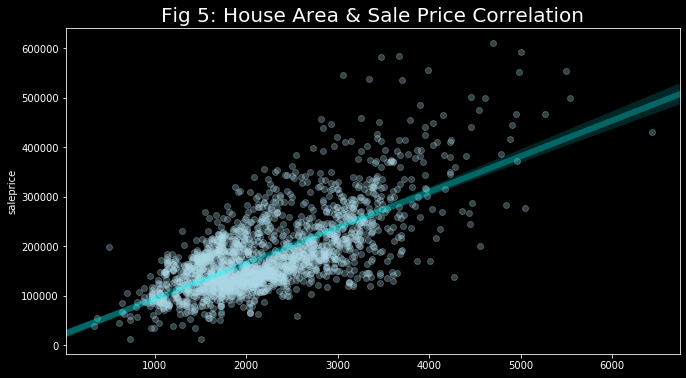

In [168]:
plt.style.use('dark_background')
plt.figure(figsize=(11,6))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Fig 5: House Area & Sale Price Correlation',fontsize=20 )
sns.regplot(house_area, df2.saleprice, data = df2, scatter_kws = {'color': 'lightblue', 'alpha': 0.3}, line_kws = {'color': '#00FFFF', 'alpha': 0.3, 'lw':6})



In [157]:
features2=['id', 'overall_qual', 'year_built', 'year_remod/add', 'total_bsmt_sf','']

In [160]:
X=df2[features2]
y=df2['saleprice']

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
Xtrain=ss.transform(X_train)
X_test=ss.transform(X_test)

In [206]:
Xs=ss.fit_transform(X)

In [207]:
ridge_alphas=np.logspace(0,5,200)


In [208]:
optimal_ridge=RidgeCV(alphas=ridge_alphas, cv=10)

In [209]:
optimal_ridge.fit(Xs,y)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [212]:
print (optimal_ridge.alpha_)

19.116440753857027
